In [5]:
import matplotlib.pyplot as plt  # fine tune control over visualizations
import numpy as np  # to manipulate data/generate random numbers
import pandas as pd  # to read/manipulate/write data from files
import seaborn as sns  # static visualizations

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram  # to perform cluster analysis
from scipy.spatial.distance import pdist, squareform  # to calculate distances and convert between condensed and square forms of a distance matrix
from sklearn.preprocessing import MinMaxScaler  # To standardize our data before clustering

In [87]:
subset_df = pd.read_csv('./my_dataset2.tsv', sep='\t')
subset_df.set_index("subjectkey", inplace=True)
subset_df

,interview_date,interview_age,sex,site_id_l,pnh_substance,pnh_encourage,sit_scr_expr_mratdiff1,sit_scr_expr_mratdiff2,sit_scr_expr_mratdiff3,sit_scr_expr_mratdiff4,eatq_p_ss_effort_cont_ss,eatq_p_ss_neg_affect_ss,eatq_p_ss_surgency_ss,eatq_p_ss_affiliation,tfmri_ma_acdn_b_scs_aalh,tfmri_ma_acdn_b_scs_aarh,tfmri_ma_acvn_b_scs_aalh,tfmri_ma_acvn_b_scs_aarh
subjectkey,,,,,,,,,,,,,,,,,,
NDAR_INVK6HKNVP1,08/23/2019,158,M,site13,0.0,0.0,-0.563008,-1.027100,0.975610,2.512195,2.157143,2.957143,3.907407,3.500000,0.808516,1.104358,0.270813,0.182127
NDAR_INVTGXYZJTP,08/06/2019,151,M,site11,3.0,0.0,0.023282,0.021951,0.146341,0.116531,3.433333,2.473016,3.707407,2.333333,0.382670,0.142997,0.245049,-0.128491
NDAR_INVL7XW6RBY,11/04/2019,141,F,site03,3.0,0.0,-3.524390,-1.752439,2.057927,4.017073,4.252381,1.580952,3.511111,4.000000,-0.027813,-0.127427,-0.010499,-0.034968
NDAR_INVXJVE0AXP,08/15/2019,141,F,site14,3.0,0.0,-0.553659,-0.208943,0.460976,1.207317,3.788889,1.657143,4.155556,4.000000,0.196826,0.162132,0.197398,0.129484
NDAR_INVYHYPL0GU,12/30/2019,136,F,site07,0.0,0.0,-1.165854,-0.580488,1.253659,2.271341,3.746032,2.506349,3.281481,4.000000,0.131077,0.220376,0.090150,0.153169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVPATWUAVA,07/13/2019,141,M,site01,3.0,0.0,0.042214,0.336043,-1.813415,-1.786585,3.528571,2.023810,4.003704,3.833333,-0.037904,0.808441,-0.164116,1.492607
NDAR_INVKKC98J6W,10/17/2019,146,M,site14,0.0,0.0,-0.003049,-0.192073,0.892954,0.709756,3.604762,2.055556,3.688889,3.833333,0.044508,0.038107,-0.088242,-0.027396
NDAR_INVUU2VUW5T,06/12/2019,154,M,site16,3.0,2.0,-0.111280,-0.294715,0.395122,-0.329268,4.426984,2.234921,4.255556,4.833333,-0.023637,-0.176844,-0.208920,-0.070434


In [88]:
subset_df['pnh_substance'] = subset_df['pnh_substance'].map({0.0: 'no', 3.0: 'yes'})
subset_df['pnh_encourage'] = subset_df['pnh_encourage'].map({0: 'no', 2: 'yes'})
subset_df

,interview_date,interview_age,sex,site_id_l,pnh_substance,pnh_encourage,sit_scr_expr_mratdiff1,sit_scr_expr_mratdiff2,sit_scr_expr_mratdiff3,sit_scr_expr_mratdiff4,eatq_p_ss_effort_cont_ss,eatq_p_ss_neg_affect_ss,eatq_p_ss_surgency_ss,eatq_p_ss_affiliation,tfmri_ma_acdn_b_scs_aalh,tfmri_ma_acdn_b_scs_aarh,tfmri_ma_acvn_b_scs_aalh,tfmri_ma_acvn_b_scs_aarh
subjectkey,,,,,,,,,,,,,,,,,,
NDAR_INVK6HKNVP1,08/23/2019,158,M,site13,no,no,-0.563008,-1.027100,0.975610,2.512195,2.157143,2.957143,3.907407,3.500000,0.808516,1.104358,0.270813,0.182127
NDAR_INVTGXYZJTP,08/06/2019,151,M,site11,yes,no,0.023282,0.021951,0.146341,0.116531,3.433333,2.473016,3.707407,2.333333,0.382670,0.142997,0.245049,-0.128491
NDAR_INVL7XW6RBY,11/04/2019,141,F,site03,yes,no,-3.524390,-1.752439,2.057927,4.017073,4.252381,1.580952,3.511111,4.000000,-0.027813,-0.127427,-0.010499,-0.034968
NDAR_INVXJVE0AXP,08/15/2019,141,F,site14,yes,no,-0.553659,-0.208943,0.460976,1.207317,3.788889,1.657143,4.155556,4.000000,0.196826,0.162132,0.197398,0.129484
NDAR_INVYHYPL0GU,12/30/2019,136,F,site07,no,no,-1.165854,-0.580488,1.253659,2.271341,3.746032,2.506349,3.281481,4.000000,0.131077,0.220376,0.090150,0.153169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVPATWUAVA,07/13/2019,141,M,site01,yes,no,0.042214,0.336043,-1.813415,-1.786585,3.528571,2.023810,4.003704,3.833333,-0.037904,0.808441,-0.164116,1.492607
NDAR_INVKKC98J6W,10/17/2019,146,M,site14,no,no,-0.003049,-0.192073,0.892954,0.709756,3.604762,2.055556,3.688889,3.833333,0.044508,0.038107,-0.088242,-0.027396
NDAR_INVUU2VUW5T,06/12/2019,154,M,site16,yes,yes,-0.111280,-0.294715,0.395122,-0.329268,4.426984,2.234921,4.255556,4.833333,-0.023637,-0.176844,-0.208920,-0.070434


In [89]:
subset_df['interview_date'] = pd.to_datetime(subset_df['interview_date'])

In [90]:
subset_df.info()
subset_df

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVK6HKNVP1 to NDAR_INVD2V80DW2
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   interview_date            1000 non-null   datetime64[ns]
 1   interview_age             1000 non-null   int64         
 2   sex                       1000 non-null   object        
 3   site_id_l                 1000 non-null   object        
 4   pnh_substance             1000 non-null   object        
 5   pnh_encourage             1000 non-null   object        
 6   sit_scr_expr_mratdiff1    1000 non-null   float64       
 7   sit_scr_expr_mratdiff2    1000 non-null   float64       
 8   sit_scr_expr_mratdiff3    1000 non-null   float64       
 9   sit_scr_expr_mratdiff4    1000 non-null   float64       
 10  eatq_p_ss_effort_cont_ss  1000 non-null   float64       
 11  eatq_p_ss_neg_affect_ss   1000 non-null   float64       
 12

,interview_date,interview_age,sex,site_id_l,pnh_substance,pnh_encourage,sit_scr_expr_mratdiff1,sit_scr_expr_mratdiff2,sit_scr_expr_mratdiff3,sit_scr_expr_mratdiff4,eatq_p_ss_effort_cont_ss,eatq_p_ss_neg_affect_ss,eatq_p_ss_surgency_ss,eatq_p_ss_affiliation,tfmri_ma_acdn_b_scs_aalh,tfmri_ma_acdn_b_scs_aarh,tfmri_ma_acvn_b_scs_aalh,tfmri_ma_acvn_b_scs_aarh
subjectkey,,,,,,,,,,,,,,,,,,
NDAR_INVK6HKNVP1,2019-08-23,158,M,site13,no,no,-0.563008,-1.027100,0.975610,2.512195,2.157143,2.957143,3.907407,3.500000,0.808516,1.104358,0.270813,0.182127
NDAR_INVTGXYZJTP,2019-08-06,151,M,site11,yes,no,0.023282,0.021951,0.146341,0.116531,3.433333,2.473016,3.707407,2.333333,0.382670,0.142997,0.245049,-0.128491
NDAR_INVL7XW6RBY,2019-11-04,141,F,site03,yes,no,-3.524390,-1.752439,2.057927,4.017073,4.252381,1.580952,3.511111,4.000000,-0.027813,-0.127427,-0.010499,-0.034968
NDAR_INVXJVE0AXP,2019-08-15,141,F,site14,yes,no,-0.553659,-0.208943,0.460976,1.207317,3.788889,1.657143,4.155556,4.000000,0.196826,0.162132,0.197398,0.129484
NDAR_INVYHYPL0GU,2019-12-30,136,F,site07,no,no,-1.165854,-0.580488,1.253659,2.271341,3.746032,2.506349,3.281481,4.000000,0.131077,0.220376,0.090150,0.153169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVPATWUAVA,2019-07-13,141,M,site01,yes,no,0.042214,0.336043,-1.813415,-1.786585,3.528571,2.023810,4.003704,3.833333,-0.037904,0.808441,-0.164116,1.492607
NDAR_INVKKC98J6W,2019-10-17,146,M,site14,no,no,-0.003049,-0.192073,0.892954,0.709756,3.604762,2.055556,3.688889,3.833333,0.044508,0.038107,-0.088242,-0.027396
NDAR_INVUU2VUW5T,2019-06-12,154,M,site16,yes,yes,-0.111280,-0.294715,0.395122,-0.329268,4.426984,2.234921,4.255556,4.833333,-0.023637,-0.176844,-0.208920,-0.070434


In [91]:
cat_df = subset_df.select_dtypes(include=["object"])
cat_df

,sex,site_id_l,pnh_substance,pnh_encourage
subjectkey,,,,
NDAR_INVK6HKNVP1,M,site13,no,no
NDAR_INVTGXYZJTP,M,site11,yes,no
NDAR_INVL7XW6RBY,F,site03,yes,no
NDAR_INVXJVE0AXP,F,site14,yes,no
NDAR_INVYHYPL0GU,F,site07,no,no
...,...,...,...,...
NDAR_INVPATWUAVA,M,site01,yes,no
NDAR_INVKKC98J6W,M,site14,no,no
NDAR_INVUU2VUW5T,M,site16,yes,yes


In [92]:
#get 𝑘−1 indicator variables out of 𝑘 categorical variables.
cat_features = pd.get_dummies(cat_df, drop_first=True)
cat_features

,sex_M,site_id_l_site02,site_id_l_site03,site_id_l_site04,site_id_l_site05,site_id_l_site06,site_id_l_site07,site_id_l_site08,site_id_l_site09,site_id_l_site10,...,site_id_l_site14,site_id_l_site15,site_id_l_site16,site_id_l_site17,site_id_l_site18,site_id_l_site19,site_id_l_site20,site_id_l_site21,pnh_substance_yes,pnh_encourage_yes
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDAR_INVK6HKNVP1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NDAR_INVTGXYZJTP,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NDAR_INVL7XW6RBY,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NDAR_INVXJVE0AXP,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
NDAR_INVYHYPL0GU,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVPATWUAVA,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NDAR_INVKKC98J6W,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
NDAR_INVUU2VUW5T,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [94]:
#combine the numerical and ordinal features and scale them to the range [0, 1]
num_df = subset_df.select_dtypes(include=["float64", 'int64'])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVK6HKNVP1 to NDAR_INVD2V80DW2
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   interview_age             1000 non-null   int64  
 1   sit_scr_expr_mratdiff1    1000 non-null   float64
 2   sit_scr_expr_mratdiff2    1000 non-null   float64
 3   sit_scr_expr_mratdiff3    1000 non-null   float64
 4   sit_scr_expr_mratdiff4    1000 non-null   float64
 5   eatq_p_ss_effort_cont_ss  1000 non-null   float64
 6   eatq_p_ss_neg_affect_ss   1000 non-null   float64
 7   eatq_p_ss_surgency_ss     1000 non-null   float64
 8   eatq_p_ss_affiliation     1000 non-null   float64
 9   tfmri_ma_acdn_b_scs_aalh  1000 non-null   float64
 10  tfmri_ma_acdn_b_scs_aarh  1000 non-null   float64
 11  tfmri_ma_acvn_b_scs_aalh  1000 non-null   float64
 12  tfmri_ma_acvn_b_scs_aarh  1000 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 10

In [95]:
#scale numerical features to lie between zero and one.
# Scale standardisation of numerical values
minmax = MinMaxScaler(feature_range=(0, 1))

num_features = pd.DataFrame(
    minmax.fit_transform(num_df),
    index=num_df.index,
    columns=num_df.columns)

In [96]:
df_scaled = pd.concat([num_features, cat_features], axis="columns")

# Confirm that all data lies between zero and one.
print(f"Data min, max: {df_scaled.min().min(), df_scaled.max().max()}")

Data min, max: (0.0, 1.0)


In [97]:
#generate the distance matrices: 
    #scipy function scipy.spatial.distance.pdist 
        #numerical datatypes: Euclidean distance or Manhattan distance
        #categorical variables: dice distance 
    #Gower's distance
    #mix of categorical and numerical: dissimilarity with mixed types of variables
!pip install gower
import gower

In [105]:
# Get the Gower's distance matrix (cluster subjects)
Y2 = gower.gower_matrix(df_scaled).astype(np.float64)

# Get the Gower's distance matrix (cluster features)
Y = gower.gower_matrix(df_scaled.T).astype(np.float64)

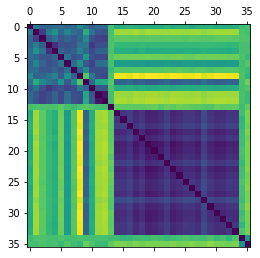

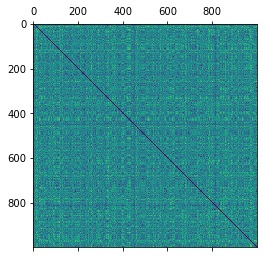

In [106]:
plt.matshow(Y)
plt.matshow(Y2)

In [107]:
# That result was in "uncondensed form". Let's use a scipy convenience
# function to convert it into a condensed array form. This stores only
# the upper triangular part since `Y` is a symmetric matrix.
Y = squareform(Y)
Y2 = squareform(Y2)

In [108]:
#perform the hierarchical clustering of our feature space
Z = linkage(Y, method="complete", optimal_ordering=True)
#perform the hierarchical clustering of subjects
Z2 = linkage(Y2, method="complete", optimal_ordering=True)

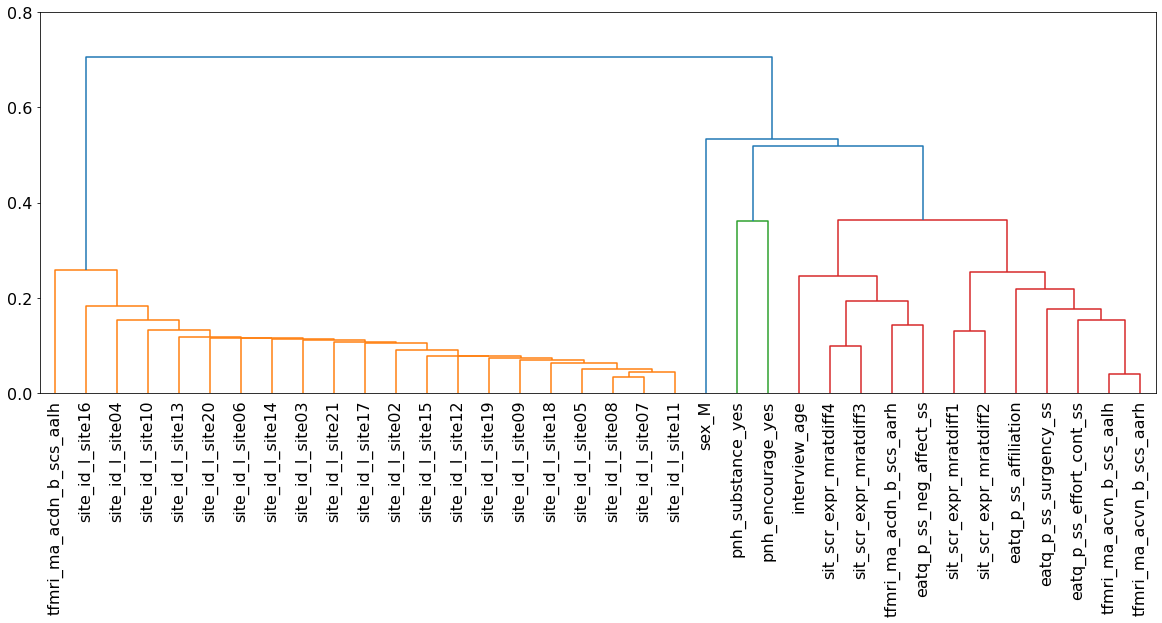

In [114]:
#height of each bracket is representative of the distance between features or subclusters
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
dn = dendrogram(
    Z,
    ax=ax,
    orientation="top",
    distance_sort='descending',
    show_leaf_counts=True,
)

# `dn["ivl"] stores a list of the feature indices in the order they appear on the x axis.
# Let's label the x-axis using the actual feature names rather than the indices
_ = ax.set_xticklabels(
    [list(df_scaled.columns)[int(i)] for i in dn["ivl"]],
    rotation=90,
    fontsize=16,
)

yticks = np.linspace(0.0, 0.8, 5)
_ = ax.set_yticks(yticks)
_ = ax.set_yticklabels([round(y, 1) for y in yticks], fontsize=16)

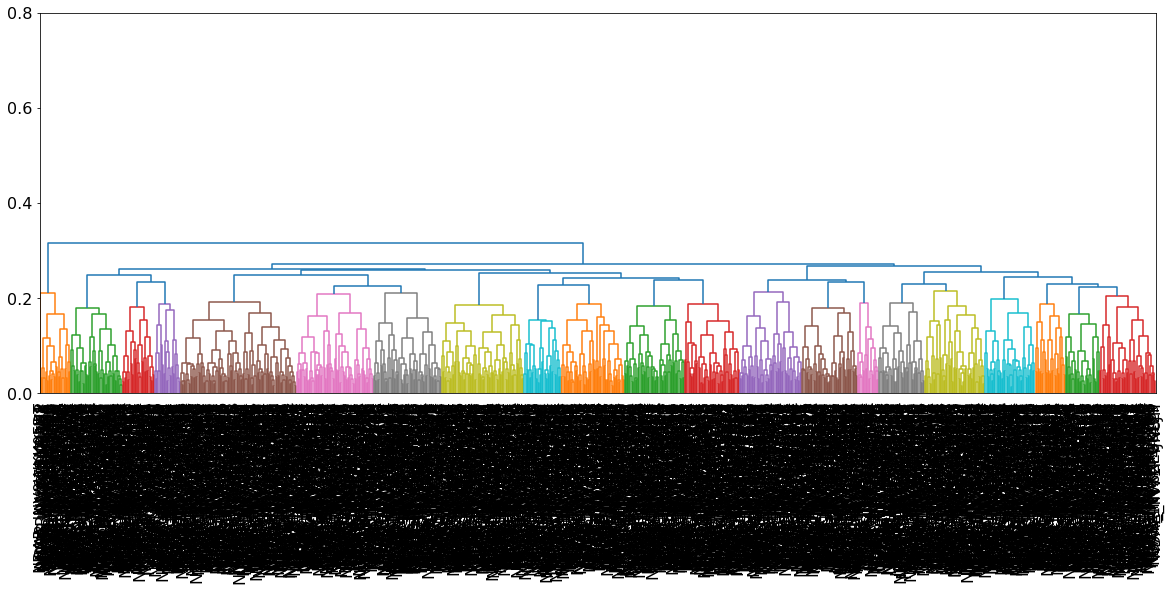

In [113]:
#height of each bracket is representative of the distance between features or subclusters
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
dn = dendrogram(
    Z2,
    ax=ax,
    orientation="top",
    distance_sort='descending',
    show_leaf_counts=True,
)

# `dn["ivl"] stores a list of the feature indices in the order they appear on the x axis.
# Let's label the x-axis using the actual feature names rather than the indices
_2 = ax.set_xticklabels(
    [list(df_scaled.index)[int(i)] for i in dn["ivl"]],
    rotation=90,
    fontsize=16,
)

yticks = np.linspace(0.0, 0.8, 5)
_2 = ax.set_yticks(yticks)
_2 = ax.set_yticklabels([round(y, 1) for y in yticks], fontsize=16)

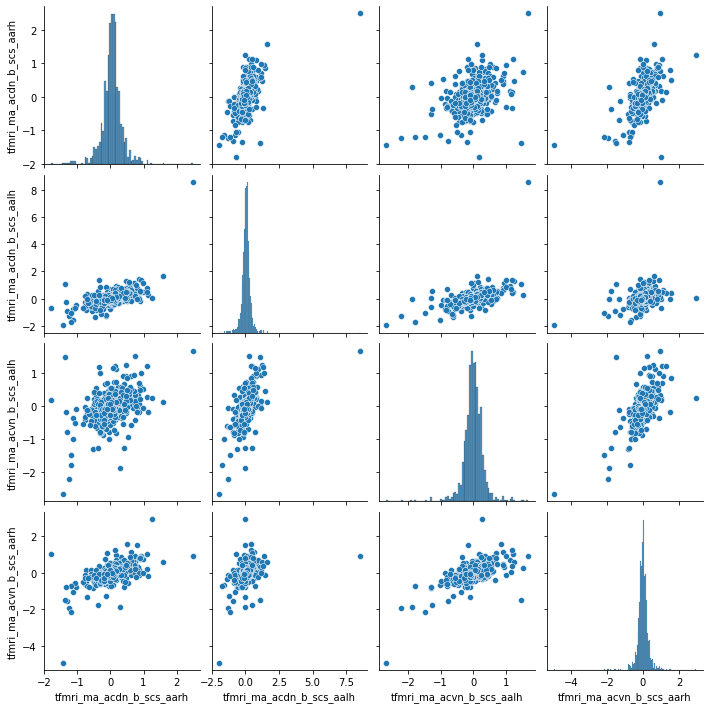

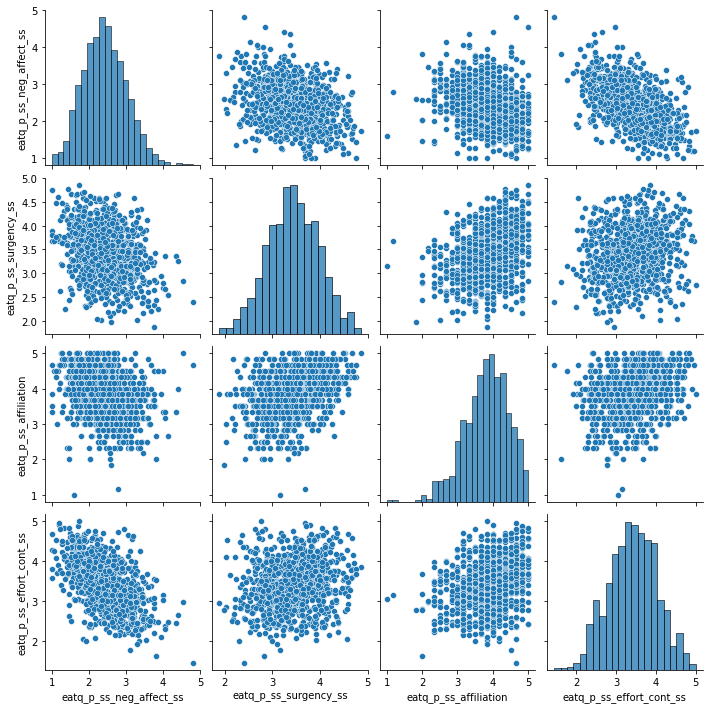

In [118]:
_ = sns.pairplot(
    subset_df,
    vars=["tfmri_ma_acdn_b_scs_aarh", "tfmri_ma_acdn_b_scs_aalh", "tfmri_ma_acvn_b_scs_aalh", "tfmri_ma_acvn_b_scs_aarh"]
)

_ = sns.pairplot(
    subset_df,
    vars=["eatq_p_ss_neg_affect_ss", "eatq_p_ss_surgency_ss", "eatq_p_ss_affiliation", "eatq_p_ss_effort_cont_ss"]
)



In [119]:
#check for internal consistency of your choice of metric 
#Cophenetic Correlation Coefficient of your clustering 
    #cophenet() function
    #compares the actual pairwise distances of your data 
    #to those computed by the hierarchical clustering
    #The closer the value is to 1, the better the clustering preserves the original distances
c, coph_dists = cophenet(Z, pdist(df_scaled.T.values, "cityblock"))
print(f"Cophenetic correlation coefficient: {c}")

#In our case, since Z was computed using the Gower distance, 
#which combined the Manhattan (or "cityblock") distance for numerical values
#and the dice distance for categorical values, 
#we will calculate the cophenetic correlation coefficient 
#between our clustering distances and the "cityblock" distance 
#using the pdist() function.

Cophenetic correlation coefficient: 0.9397995370188351
